# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
trainbanking = pd.read_csv(r'/kaggle/input/playground-series-s4e1/train.csv')
testbanking = pd.read_csv(r'/kaggle/input/playground-series-s4e1/test.csv')

# Exploratory Data Analysis

In [3]:
testbanking.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
5,165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
6,165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
7,165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
8,165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10
9,165043,15752344,Teng,645,Spain,Male,30.0,5,0.00,2,0.0,1.0,149195.44


In [4]:
trainbanking.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [5]:
trainbanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
testbanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [7]:
trainbanking.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
trainbanking.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
trainbanking.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

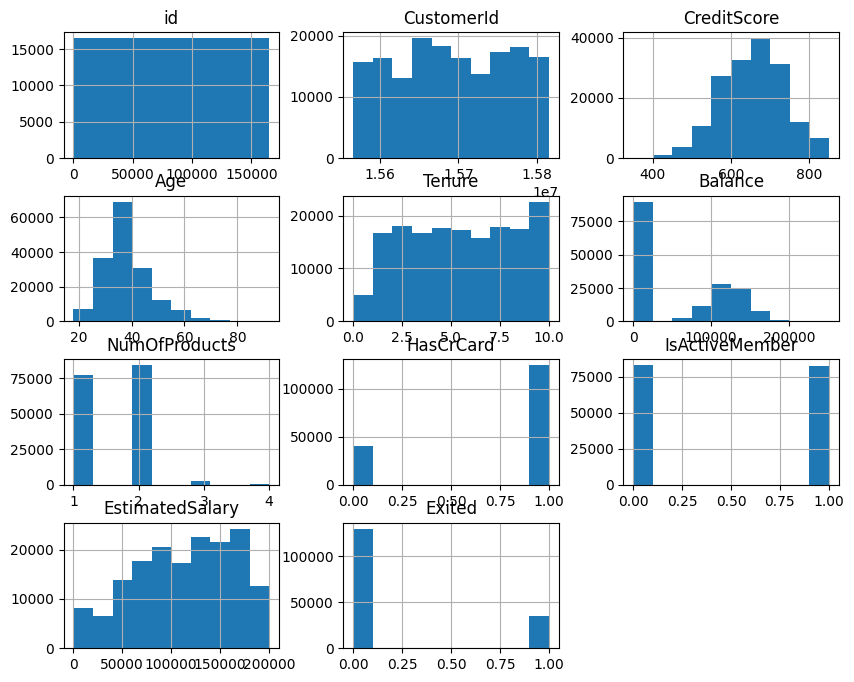

In [10]:
trainbanking.hist(figsize=(10,8))
plt.show()

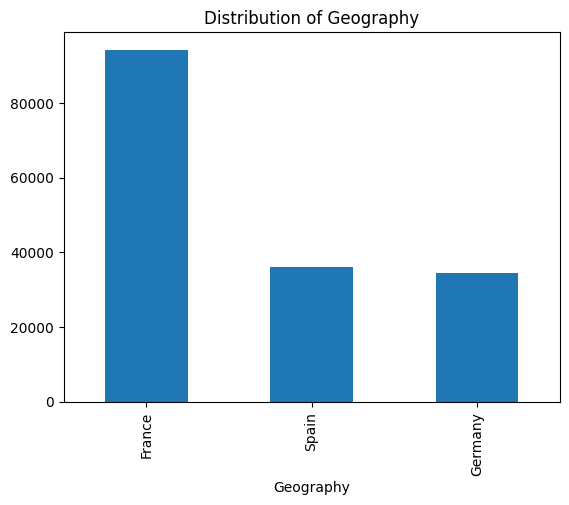

In [11]:
trainbanking['Geography'].value_counts().plot(kind ='bar')
plt.title('Distribution of Geography')
plt.show()

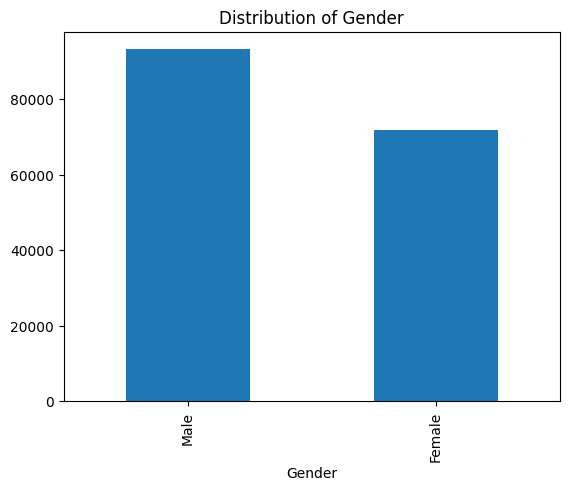

In [12]:
trainbanking['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.show()

In [13]:
trainbankinggcounts = trainbanking['Geography'].value_counts()
print('Geography counts',trainbankinggcounts)
trainbankinggencounts = trainbanking['Gender'].value_counts()
print('Gender counts',trainbankinggencounts)

Geography counts Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
Gender counts Gender
Male      93150
Female    71884
Name: count, dtype: int64


In [14]:
averageagebyexited = trainbanking.groupby('Exited')['Age'].mean()
print("\nAverage age by exited\n",averageagebyexited)


Average age by exited
 Exited
0    36.560480
1    43.958478
Name: Age, dtype: float64


### Cross Tabulation between is active member and exited

In [15]:
activemember_exit_cross = pd.crosstab(trainbanking['IsActiveMember'],trainbanking['Exited'],normalize='index')*100
print("\n Cross tabulation between active member and exited \n",activemember_exit_cross)


 Cross tabulation between active member and exited 
 Exited                  0          1
IsActiveMember                      
0.0             70.291368  29.708632
1.0             87.465459  12.534541


### Cross Tabulation between has card and exited 

In [16]:
hascard_exit_cross = pd.crosstab(trainbanking['HasCrCard'],trainbanking['Exited'],normalize='index')*100
print("\n Cross tabulation between has credit card and exited \n",hascard_exit_cross)



 Cross tabulation between has credit card and exited 
 Exited             0          1
HasCrCard                      
0.0        77.257056  22.742944
1.0        79.356736  20.643264


In [17]:
# Createing a label encoder
label_encoder = LabelEncoder()
trainbanking['Geography'] =  label_encoder.fit_transform(trainbanking['Geography'])
trainbanking['Gender'] = label_encoder.fit_transform(trainbanking['Gender'])
trainbanking = trainbanking.drop('Surname',axis=1)
trainbanking.head()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Label Encoding 

In [18]:
# Createing a label encoder
label_encoder = LabelEncoder()
testbanking['Geography'] =  label_encoder.fit_transform(testbanking['Geography'])
testbanking['Gender'] = label_encoder.fit_transform(testbanking['Gender'])
testbanking = testbanking.drop('Surname',axis=1)
testbanking.head()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00


# Getting the data ready for Random Forest Classifier 

In [19]:
X = trainbanking.drop("Exited", axis=1)  # Features
y = trainbanking["Exited"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = rf.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8605144363316872
Confusion Matrix:
 [[24717  1335]
 [ 3269  3686]]


In [25]:
y_pred = rf.predict(testbanking)

In [26]:
predictions = pd.DataFrame({
    "id": testbanking["id"],  # Assuming "id" is a column in your test data
    "Exited": y_pred
})

In [27]:
predictions.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0


In [28]:

# Round predictions to 2 decimal places and convert to integers for clarity:
predictions["Exited"] = predictions["Exited"].round(2).astype(int)

In [29]:
predictions.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0


In [30]:
predictions.to_csv("submission.csv",index=False)